In [61]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [62]:
df = pd.read_csv("Data/cleaned_df.csv")
df.head()

,Qualifications,location,Country,Work Type,Company Size,Job Posting Date,Preference,Job Title,Role,Job Description,skills,Responsibilities,Company,Company Profile,min_experience,max_experience,average_experience,min_salary,max_salary,average_salary
0,M.Tech,Douglas,Isle of Man,Intern,26801,2022-04-24,Female,Digital Marketing Specialist,Social Media Manager,Social Media Managers oversee an organizations...,"Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",5,15,10.0,59000,99000,79000.0
1,BCA,Ashgabat,Turkmenistan,Intern,100340,2022-12-19,Female,Web Developer,Frontend Web Developer,Frontend Web Developers design and implement u...,"HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",2,12,7.0,56000,116000,86000.0
2,PhD,Macao,"Macao SAR, China",Temporary,84525,2022-09-14,Male,Operations Manager,Quality Control Manager,Quality Control Managers establish and enforce...,Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",0,12,6.0,61000,104000,82500.0
3,PhD,Porto-Novo,Benin,Full-Time,129896,2023-02-25,Female,Network Engineer,Wireless Network Engineer,"Wireless Network Engineers design, implement, ...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",4,11,7.5,65000,91000,78000.0
4,MBA,Santiago,Chile,Intern,53944,2022-10-11,Female,Event Manager,Conference Manager,A Conference Manager coordinates and manages c...,Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",1,12,6.5,64000,87000,75500.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610462 entries, 0 to 1610461
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Qualifications      1610462 non-null  object 
 1   location            1610462 non-null  object 
 2   Country             1610462 non-null  object 
 3   Work Type           1610462 non-null  object 
 4   Company Size        1610462 non-null  int64  
 5   Job Posting Date    1610462 non-null  object 
 6   Preference          1610462 non-null  object 
 7   Job Title           1610462 non-null  object 
 8   Role                1610462 non-null  object 
 9   Job Description     1610462 non-null  object 
 10  skills              1610462 non-null  object 
 11  Responsibilities    1610462 non-null  object 
 12  Company             1610462 non-null  object 
 13  Company Profile     1610462 non-null  object 
 14  min_experience      1610462 non-null  int64  
 15  max_experience 

In [64]:
df.shape

(1610462, 20)

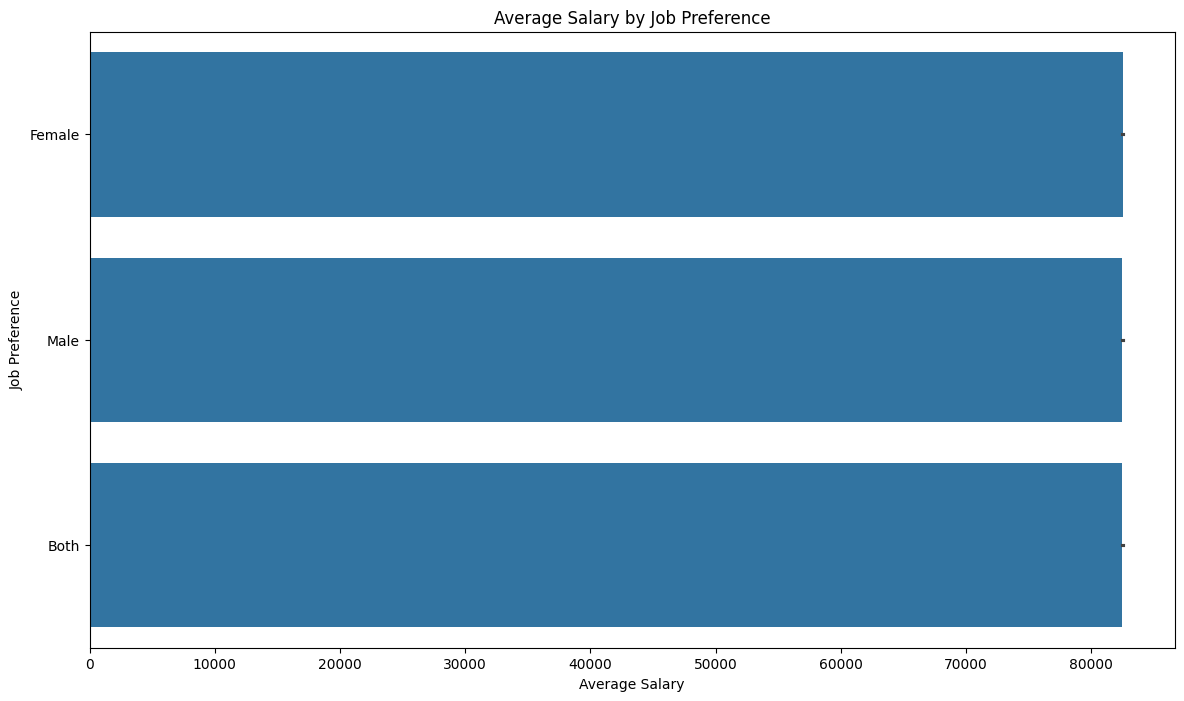

In [65]:
plt.figure(figsize=(14, 8))
sns.barplot(x='average_salary', y='Preference', data=df, estimator='mean')
plt.title('Average Salary by Job Preference')
plt.xlabel('Average Salary')
plt.ylabel('Job Preference')
plt.show()


In [66]:
df.groupby('Preference')['average_salary'].count()

Preference
Both      536588
Female    536494
Male      537380
Name: average_salary, dtype: int64

In [67]:
df['Job Posting Date'] = pd.to_datetime(df['Job Posting Date'])

##### Job opportunities: Which country has the most job opportunities?

In [70]:
top_countries = df['Country'].value_counts().head(10).to_frame().reset_index()
top_countries

,Country,count
0,Malta,7694
1,"Venezuela, RB",7672
2,Somalia,7656
3,Sierra Leone,7631
4,Vietnam,7630
5,Sri Lanka,7621
6,Azerbaijan,7618
7,Rwanda,7614
8,San Marino,7608
9,Turkmenistan,7607


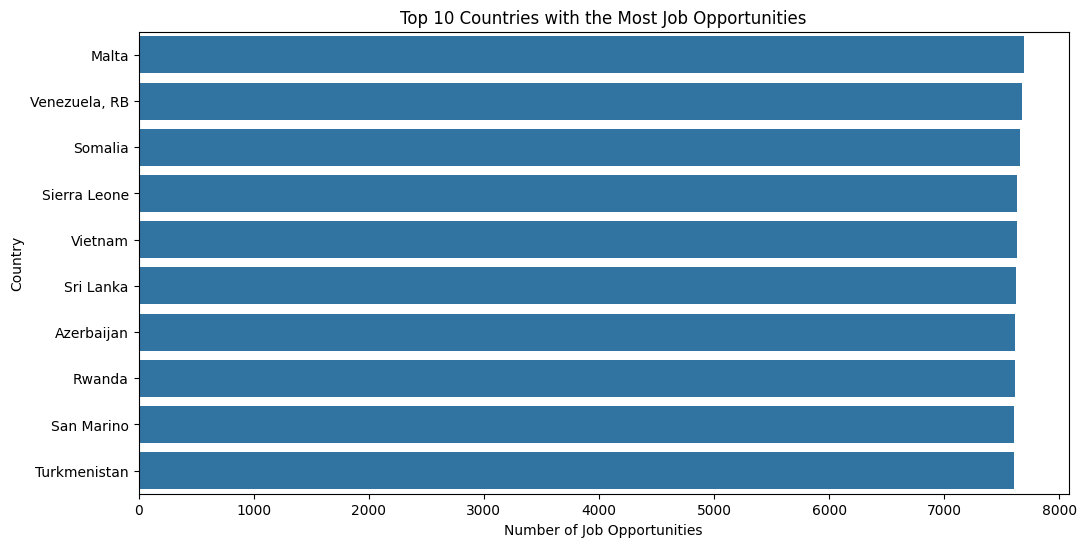

In [71]:
top_countries = df['Country'].value_counts().head(10).to_frame().reset_index()
top_countries.columns = ['Country', 'Job Opportunities']

plt.figure(figsize=(12, 6))
sns.barplot(x='Job Opportunities', y='Country', data=top_countries)
plt.title('Top 10 Countries with the Most Job Opportunities')
plt.xlabel('Number of Job Opportunities')
plt.ylabel('Country')
plt.show()

##### Qualifications: What are the most common qualifications required for the jobs listed?


In [72]:
common_qualifications = df['Qualifications'].value_counts().head(10).to_frame().reset_index()
common_qualifications.columns = ['Qualification', 'Count']

print(common_qualifications)

  Qualification   Count
0           BBA  161574
1            BA  161566
2           BCA  161215
3        M.Tech  161186
4           PhD  161109
5           MBA  160967
6        B.Tech  160886
7         M.Com  160833
8         B.Com  160774
9           MCA  160352


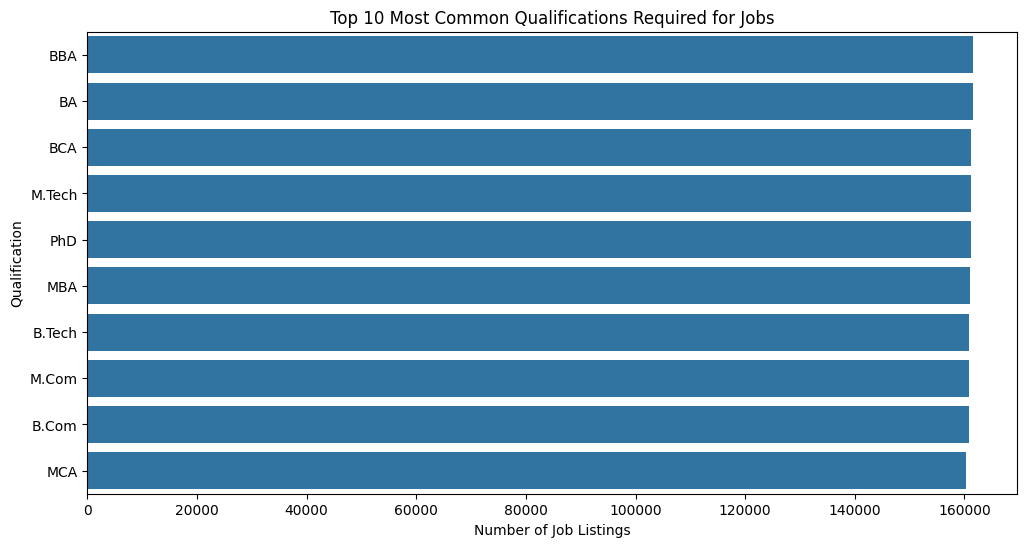

In [73]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Qualification', data=common_qualifications)
plt.title('Top 10 Most Common Qualifications Required for Jobs')
plt.xlabel('Number of Job Listings')
plt.ylabel('Qualification')
plt.show()

In [78]:
common_Job_Title = df['Job Title'].value_counts().head(10).to_frame().reset_index()
common_Job_Title

,Job Title,count
0,b'UX/UI Designer',48376
1,b'Digital Marketing Specialist',27881
2,b'Software Engineer',27537
3,b'Network Engineer',24307
4,b'Software Tester',20871
5,b'Executive Assistant',20710
6,b'Procurement Manager',20664
7,b'Financial Advisor',20605
8,b'Sales Representative',17612
9,b'Social Media Manager',17549


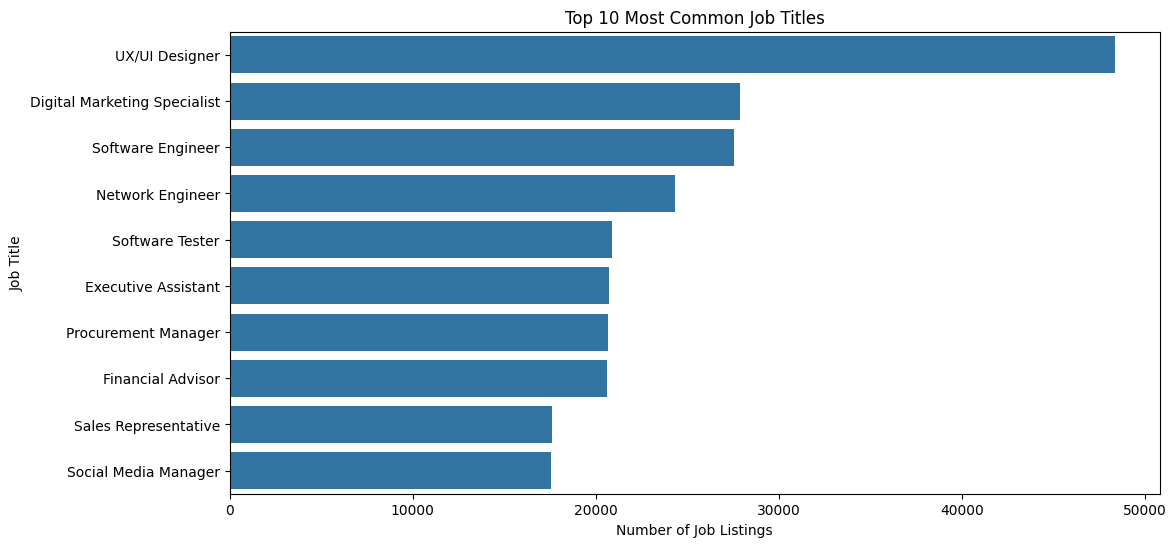

In [81]:
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='Job Title', data=common_Job_Title)
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Number of Job Listings')
plt.ylabel('Job Title')
plt.show()

In [82]:
df.set_index('Job Posting Date', inplace=True)

In [83]:
monthly_postings = df.resample('M').size()

C:\Users\RC543\AppData\Local\Temp\ipykernel_32384\606198679.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_postings = df.resample('M').size()


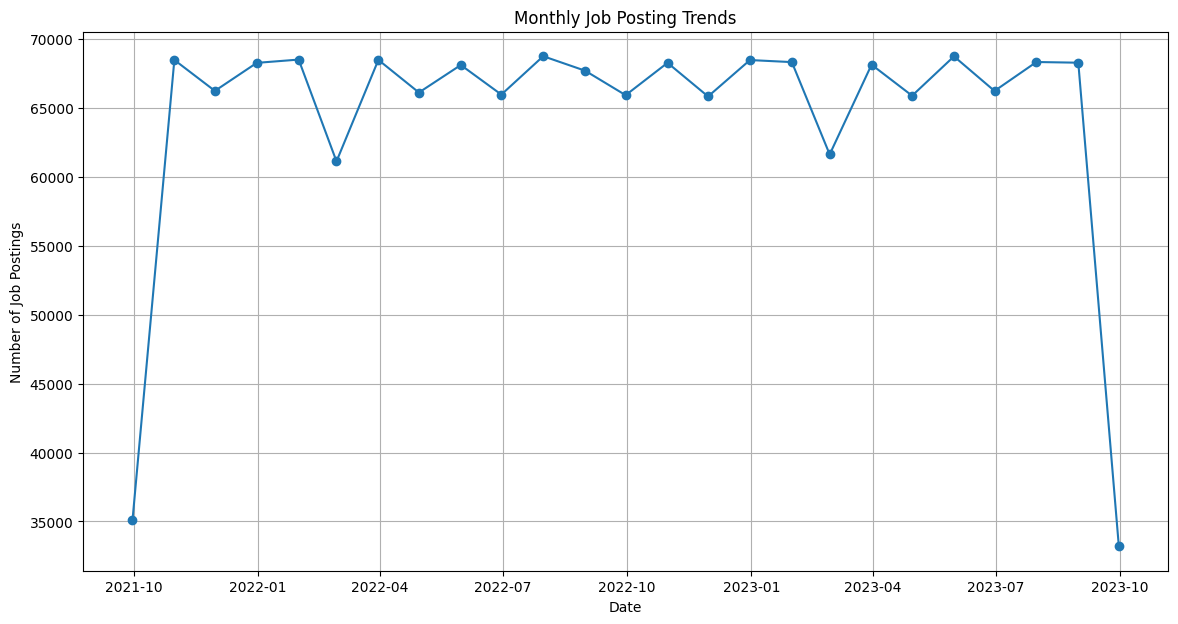

In [84]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_postings, marker='o', linestyle='-')
plt.title('Monthly Job Posting Trends')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.grid(True)
plt.show()


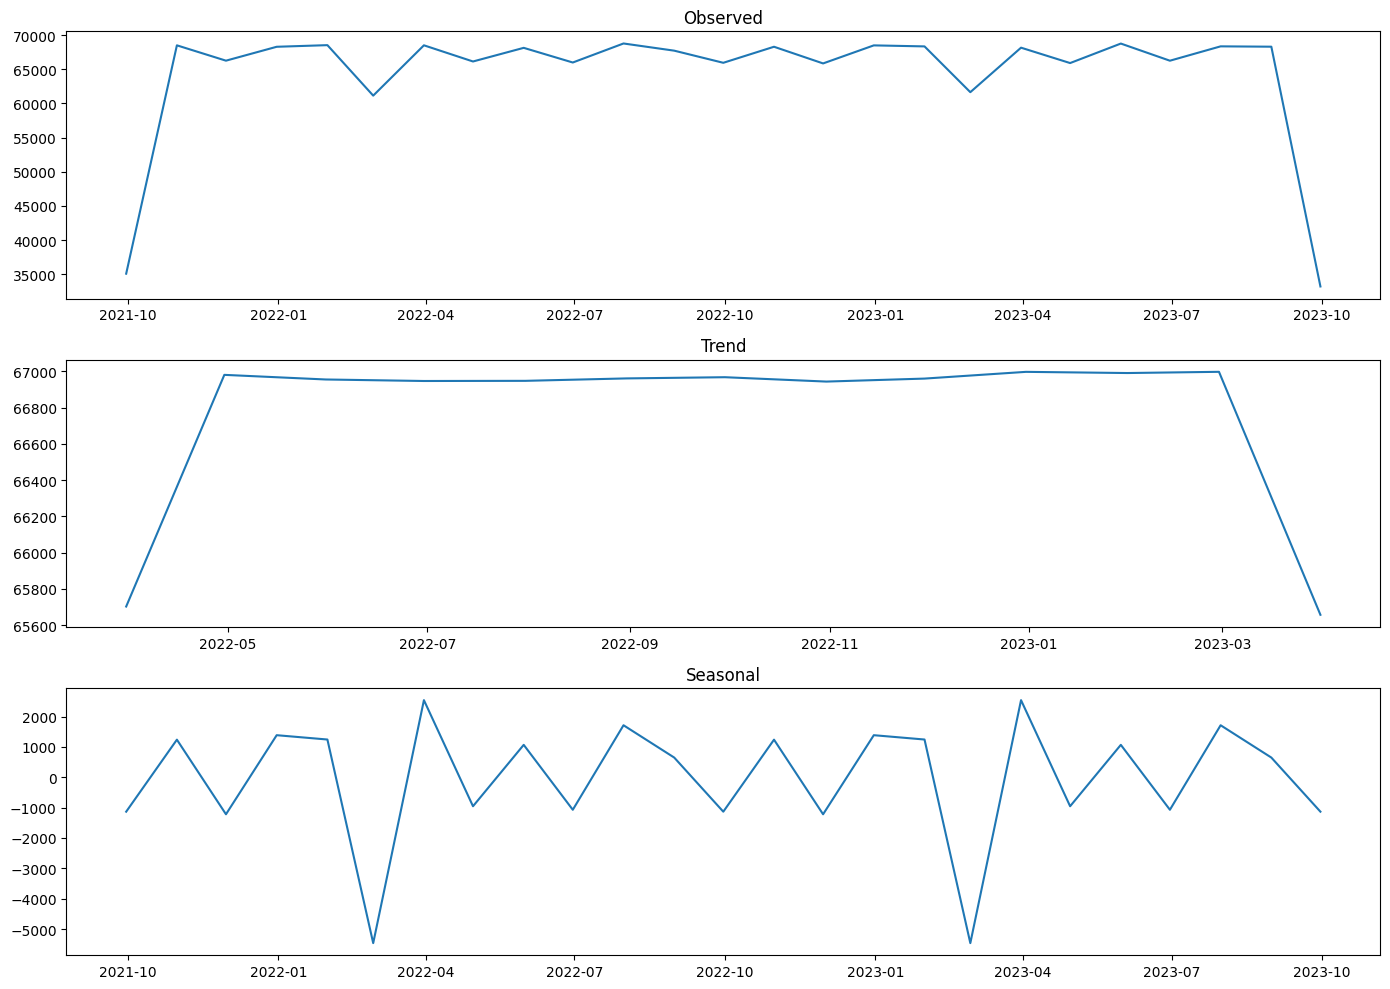

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(monthly_postings, model='additive')

plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 1)
plt.plot(decomposition.observed)
plt.title('Observed')

plt.subplot(3, 1, 2)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(3, 1, 3)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')

plt.tight_layout()
plt.show()


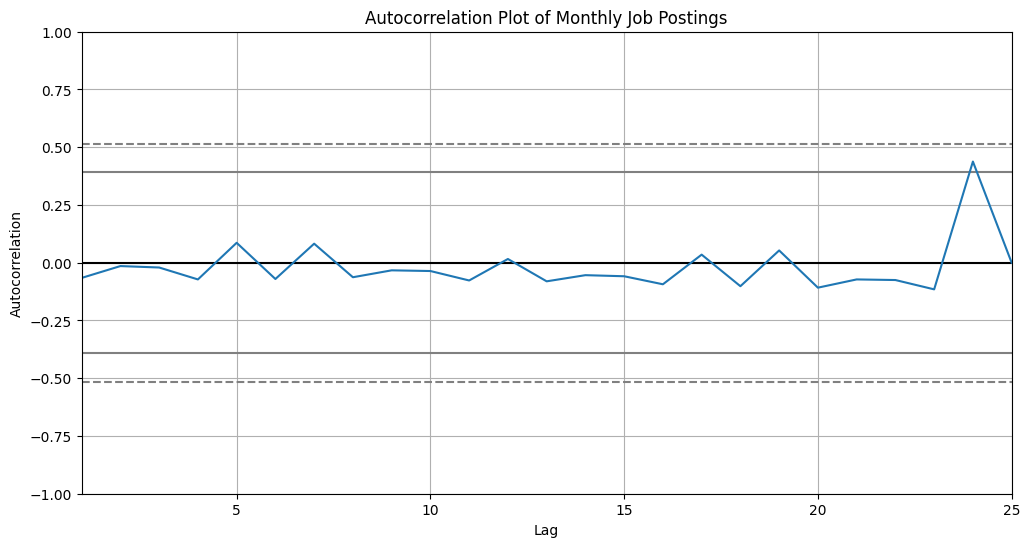

In [88]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(12, 6))
autocorrelation_plot(monthly_postings)
plt.title('Autocorrelation Plot of Monthly Job Postings')
plt.show()